In [2]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import re
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [4]:
import os

In [5]:
os.getcwd()

'C:\\Users\\harol\\mypython\\Predictive Analytics\\Sentiment Analysis Project'

In [6]:
df_ATT = pd.read_csv('att2.csv', names = ['timestamp','tweet'],encoding='utf-8')

In [7]:
df_ATT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3570 entries, 0 to 3569
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  3570 non-null   object
 1   tweet      3570 non-null   object
dtypes: object(2)
memory usage: 55.9+ KB


In [8]:
df_ATT.count()

timestamp    3570
tweet        3570
dtype: int64

In [9]:
df_ATT.timestamp = pd.to_datetime(df_ATT.timestamp)

In [10]:
df_ATT.tweet = df_ATT.tweet.str[2:]

In [11]:
df_ATT.head()

,timestamp,tweet
0,2021-05-26 00:46:00,"[2105.11478] Rikkert Frederix, Ioannis Tsiniko..."
1,2021-05-26 00:36:33,@stock_rabbi @DontFeedBear $T not as good afte...
2,2021-05-26 00:26:16,AT&amp;T stock review\n\nhttps://t.co/PgKNm1QC...
3,2021-05-26 00:24:46,$T regretting the move to entertainment. $AMZN...
4,2021-05-26 00:15:07,@QTRResearch Look into $BEST inc\xf0\x9f\x91\x...


In [12]:
df_ATT.tweet = df_ATT.tweet.str[:len(df_ATT.tweet)]

In [13]:
df_ATT.head()

,timestamp,tweet
0,2021-05-26 00:46:00,"[2105.11478] Rikkert Frederix, Ioannis Tsiniko..."
1,2021-05-26 00:36:33,@stock_rabbi @DontFeedBear $T not as good afte...
2,2021-05-26 00:26:16,AT&amp;T stock review\n\nhttps://t.co/PgKNm1QC...
3,2021-05-26 00:24:46,$T regretting the move to entertainment. $AMZN...
4,2021-05-26 00:15:07,@QTRResearch Look into $BEST inc\xf0\x9f\x91\x...


In [14]:
df_ATT = df_ATT.sort_values(by=['timestamp'])

In [15]:
df_ATT = df_ATT.drop_duplicates(subset=['tweet'])

In [16]:
df_ATT.timestamp = df_ATT.timestamp - timedelta(hours=4)

In [17]:
df_ATT.head()

,timestamp,tweet
3569,2021-05-18 07:45:30,$T $DISCA David Zaslav Will Stay On As Discove...
3568,2021-05-18 07:45:49,@JSreng8 @BillBrewsterSCG @Balsikafi I didn\xe...
3567,2021-05-18 07:45:50,The more I read about this $T discovery deal t...
3566,2021-05-18 07:45:54,Today's Dark Pool Whisper Trade Results! Bigge...
3565,2021-05-18 07:46:50,$T new alert at https://t.co/A7qrDarJHY #sto...


In [18]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from textblob import TextBlob

In [19]:
df_ATT['cleaned'] = df_ATT.tweet.astype(str)

In [20]:
df_ATT.head()

,timestamp,tweet,cleaned
3569,2021-05-18 07:45:30,$T $DISCA David Zaslav Will Stay On As Discove...,$T $DISCA David Zaslav Will Stay On As Discove...
3568,2021-05-18 07:45:49,@JSreng8 @BillBrewsterSCG @Balsikafi I didn\xe...,@JSreng8 @BillBrewsterSCG @Balsikafi I didn\xe...
3567,2021-05-18 07:45:50,The more I read about this $T discovery deal t...,The more I read about this $T discovery deal t...
3566,2021-05-18 07:45:54,Today's Dark Pool Whisper Trade Results! Bigge...,Today's Dark Pool Whisper Trade Results! Bigge...
3565,2021-05-18 07:46:50,$T new alert at https://t.co/A7qrDarJHY #sto...,$T new alert at https://t.co/A7qrDarJHY #sto...


In [21]:
df_ATT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3558 entries, 3569 to 0
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  3558 non-null   datetime64[ns]
 1   tweet      3558 non-null   object        
 2   cleaned    3558 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 111.2+ KB


In [22]:
df_ATT.cleaned = df_ATT.cleaned.apply(lambda x: " ".join(x.lower() for x in x.split()))

In [23]:
df_ATT.head()

,timestamp,tweet,cleaned
3569,2021-05-18 07:45:30,$T $DISCA David Zaslav Will Stay On As Discove...,$t $disca david zaslav will stay on as discove...
3568,2021-05-18 07:45:49,@JSreng8 @BillBrewsterSCG @Balsikafi I didn\xe...,@jsreng8 @billbrewsterscg @balsikafi i didn\xe...
3567,2021-05-18 07:45:50,The more I read about this $T discovery deal t...,the more i read about this $t discovery deal t...
3566,2021-05-18 07:45:54,Today's Dark Pool Whisper Trade Results! Bigge...,today's dark pool whisper trade results! bigge...
3565,2021-05-18 07:46:50,$T new alert at https://t.co/A7qrDarJHY #sto...,$t new alert at https://t.co/a7qrdarjhy #stock...


In [24]:
df_ATT.cleaned = df_ATT.cleaned.apply(lambda x: re.sub("@[A-Za-z0-9]+","", x))

In [25]:
df_ATT.head()

,timestamp,tweet,cleaned
3569,2021-05-18 07:45:30,$T $DISCA David Zaslav Will Stay On As Discove...,$t $disca david zaslav will stay on as discove...
3568,2021-05-18 07:45:49,@JSreng8 @BillBrewsterSCG @Balsikafi I didn\xe...,i didn\xe2\x80\x99t realize when people ref...
3567,2021-05-18 07:45:50,The more I read about this $T discovery deal t...,the more i read about this $t discovery deal t...
3566,2021-05-18 07:45:54,Today's Dark Pool Whisper Trade Results! Bigge...,today's dark pool whisper trade results! bigge...
3565,2021-05-18 07:46:50,$T new alert at https://t.co/A7qrDarJHY #sto...,$t new alert at https://t.co/a7qrdarjhy #stock...


In [26]:
stop = stopwords.words('english')
df_ATT.cleaned = df_ATT.cleaned.apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [27]:
stemmer = PorterStemmer()

In [28]:
df_ATT.cleaned = df_ATT.cleaned.apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))

In [29]:
df_ATT.head()

,timestamp,tweet,cleaned
3569,2021-05-18 07:45:30,$T $DISCA David Zaslav Will Stay On As Discove...,$t $disca david zaslav stay discoveri ceo leas...
3568,2021-05-18 07:45:49,@JSreng8 @BillBrewsterSCG @Balsikafi I didn\xe...,didn\xe2\x80\x99t realiz peopl refer $t safe i...
3567,2021-05-18 07:45:50,The more I read about this $T discovery deal t...,read $t discoveri deal i\xe2\x80\x99m dumbfoun...
3566,2021-05-18 07:45:54,Today's Dark Pool Whisper Trade Results! Bigge...,today' dark pool whisper trade results! bigges...
3565,2021-05-18 07:46:50,$T new alert at https://t.co/A7qrDarJHY #sto...,$t new alert https://t.co/a7qrdarjhi #stock #d...


In [30]:
def polar(x):
    return TextBlob(x).sentiment.polarity

In [31]:
df_ATT['sentiment'] = df_ATT.cleaned.apply(polar)

In [32]:
df_ATT.head()

,timestamp,tweet,cleaned,sentiment
3569,2021-05-18 07:45:30,$T $DISCA David Zaslav Will Stay On As Discove...,$t $disca david zaslav stay discoveri ceo leas...,-0.300000
3568,2021-05-18 07:45:49,@JSreng8 @BillBrewsterSCG @Balsikafi I didn\xe...,didn\xe2\x80\x99t realiz peopl refer $t safe i...,0.500000
3567,2021-05-18 07:45:50,The more I read about this $T discovery deal t...,read $t discoveri deal i\xe2\x80\x99m dumbfoun...,0.000000
3566,2021-05-18 07:45:54,Today's Dark Pool Whisper Trade Results! Bigge...,today' dark pool whisper trade results! bigges...,-0.187500
3565,2021-05-18 07:46:50,$T new alert at https://t.co/A7qrDarJHY #sto...,$t new alert https://t.co/a7qrdarjhi #stock #d...,0.136364


In [33]:
df_ATT2 = df_ATT.resample(rule='30Min',on='timestamp').mean()

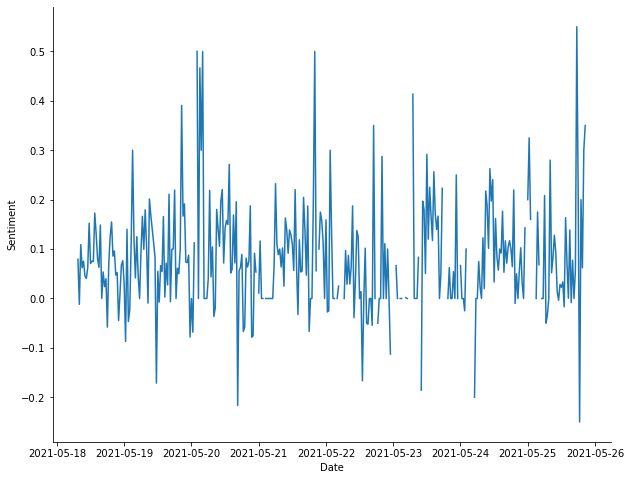

In [34]:
plt.figure(figsize=(10,8))
plt.plot(df_ATT2.sentiment)
plt.xlabel('Date'), plt.ylabel('Sentiment')
sns.despine(right=True, top=True)
plt.show()

In [35]:
df_ATT2.head()

,sentiment
timestamp,
2021-05-18 07:30:00,0.079309
2021-05-18 08:00:00,-0.011836
2021-05-18 08:30:00,0.109008
2021-05-18 09:00:00,0.062104
2021-05-18 09:30:00,0.075518


In [36]:
df_ATT2.size

363

In [37]:
df_ATTstock = pd.read_csv('AT&T stock.csv')

In [38]:
df_ATTstock = pd.melt(df_ATTstock, id_vars='Time').rename(columns={'variable':'date', 'value':'price'})

In [39]:
df_ATTstock.head()

,Time,date,price
0,9:30:00,10/5/2021,$32.43
1,10:00:00,10/5/2021,$32.67
2,10:30:00,10/5/2021,$32.66
3,11:00:00,10/5/2021,$32.78
4,11:30:00,10/5/2021,$32.86


In [40]:
df_ATTstock.dtypes

Time     object
date     object
price    object
dtype: object

In [41]:
df_ATTstock['timestamp'] = df_ATTstock.date.astype(str) + ' ' + df_ATTstock.Time.astype(str)

In [42]:
df_ATTstock.timestamp = pd.to_datetime(df_ATTstock.timestamp)

In [44]:
df_ATTstock = df_ATTstock.drop(['Time', 'date'], axis=1)

In [45]:
df_ATTstock.head()

,price,timestamp
0,$32.43,2021-10-05 09:30:00
1,$32.67,2021-10-05 10:00:00
2,$32.66,2021-10-05 10:30:00
3,$32.78,2021-10-05 11:00:00
4,$32.86,2021-10-05 11:30:00


In [46]:
df_ATT2.head()

,sentiment
timestamp,
2021-05-18 07:30:00,0.079309
2021-05-18 08:00:00,-0.011836
2021-05-18 08:30:00,0.109008
2021-05-18 09:00:00,0.062104
2021-05-18 09:30:00,0.075518
